Nama:

In [1]:
print("Rahman Aziz Firmansyah")

Rahman Aziz Firmansyah


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import mutual_info_classif, SelectKBest, VarianceThreshold, mutual_info_regression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, precision_recall_curve, roc_auc_score, roc_curve, r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import spearmanr
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

(1) Split X, y dari dataset churn. y = average utilization ratio

In [3]:
churn = pd.read_csv('churn.csv')
churn.drop('CLIENTNUM', axis=1, inplace=True)
churn.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
y = churn['Avg_Utilization_Ratio']
X = churn.drop('Avg_Utilization_Ratio', axis=1).select_dtypes('number')

(2) Split trainset dan testset. test size = 0.2.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(3) Lakukan transformasi yang diperlukan pada trainset. Lakukan transformasi serupa pada testset tanpa fitting data ulang.

In [6]:
minmax = MinMaxScaler()
X_train_scaled = pd.DataFrame(minmax.fit_transform(X_train), columns=minmax.feature_names_in_)
X_test_scaled = pd.DataFrame(minmax.transform(X_test), columns=minmax.feature_names_in_)

(4) Siapkan 4 regressor learning alg.: linear, lasso, ridge, dan elastic net yanng dikombinasikan dengan polynomial features dalam satu pipeline. Dengan menggunakan cross validation tentukan:<p>
linear: derajat polinom<p>
lasso dan ridge: derajat polinom dan alpha<p>
elastic net: derajat polinom, alpha dan l1_ratio

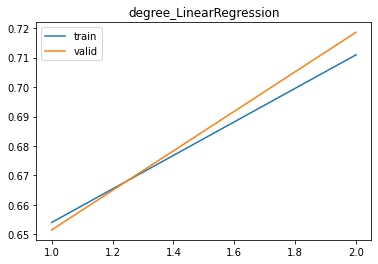

2

In [7]:
#menentukan derajat polinom untuk linear regression
params = [1, 2]
train = []
valid = []

for par in params:
    pipe_linear = make_pipeline(PolynomialFeatures(degree=par), LinearRegression())
    result = cross_validate(pipe_linear, X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('degree_LinearRegression')
plt.show()
d_linear = params[np.argmax(valid)]
d_linear

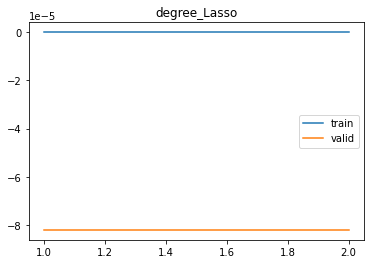

1

In [8]:
#menentukan derajat polinom untuk lasso
params = [1, 2]
train = []
valid = []

for par in params:
    pipe_lasso = make_pipeline(PolynomialFeatures(degree=par), Lasso())
    result = cross_validate(pipe_lasso, X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('degree_Lasso')
plt.show()
d_lasso = params[np.argmax(valid)]
d_lasso

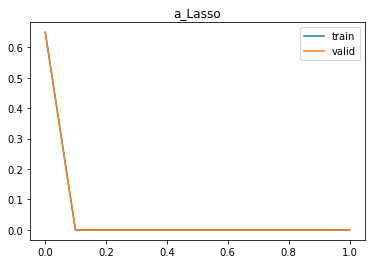

0.001

In [9]:
#menentukan alpha untuk lasso
params = [0.001, 0.1, 0.5, 1]
train = []
valid = []

for par in params:
    pipe_lasso = make_pipeline(PolynomialFeatures(degree=d_lasso), Lasso(alpha=par))
    result = cross_validate(pipe_lasso, X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('a_Lasso')
plt.show()
a_lasso = params[np.argmax(valid)]
a_lasso

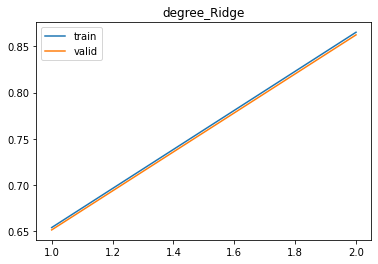

2

In [10]:
#menentukan derajat polinom untuk ridge
params = [1, 2]
train = []
valid = []

for par in params:
    pipe_ridge = make_pipeline(PolynomialFeatures(degree=par), Ridge())
    result = cross_validate(pipe_ridge, X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('degree_Ridge')
plt.show()
d_ridge = params[np.argmax(valid)]
d_ridge

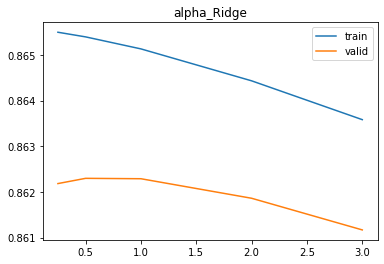

0.5

In [11]:
#menentukan alpha untuk ridge
params = [0.25, 0.5, 1, 2, 3]
train = []
valid = []

for par in params:
    pipe_ridge = make_pipeline(PolynomialFeatures(degree=d_ridge), Ridge(alpha=par))
    result = cross_validate(pipe_ridge, X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('alpha_Ridge')
plt.show()
a_ridge = params[np.argmax(valid)]
a_ridge

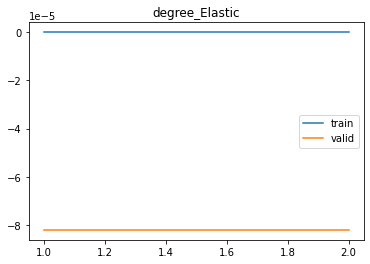

1

In [12]:
#menentukan derajat polinom untuk elastic net
params = [1, 2]
train = []
valid = []

for par in params:
    pipe_elastic = make_pipeline(PolynomialFeatures(degree=par), ElasticNet())
    result = cross_validate(pipe_elastic, X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('degree_Elastic')
plt.show()
d_elastic = params[np.argmax(valid)]
d_elastic

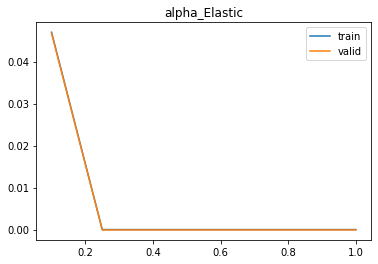

0.1

In [13]:
#menentukan alpha untuk elastic net
params = [0.1, 0.25, 0.5, 0.75, 1]
train = []
valid = []

for par in params:
    pipe_elastic = make_pipeline(PolynomialFeatures(degree=d_elastic), ElasticNet(alpha=par))
    result = cross_validate(pipe_elastic, X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('alpha_Elastic')
plt.show()
a_elastic = params[np.argmax(valid)]
a_elastic

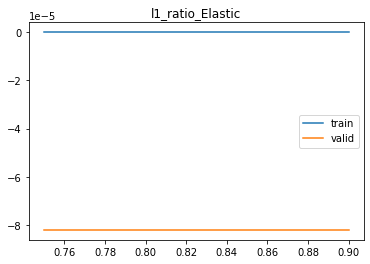

0.75

In [14]:
#menentukan l1-ratio untuk elastic net
params = [0.75, 0.8, 0.9]
train = []
valid = []

for par in params:
    pipe_elastic = make_pipeline(PolynomialFeatures(degree=d_elastic), ElasticNet(alpha=a_elastic, l1_ratio=par))
    result = cross_validate(pipe_elastic, X_train_scaled, y_train, cv=5, scoring = 'r2', return_train_score=True)
    train.append(result['train_score'].mean())
    valid.append(result['test_score'].mean())

sns.lineplot(x = params, y = train, label = 'train')
sns.lineplot( x = params, y = valid, label = 'valid')
plt.title('l1_ratio_Elastic')
plt.show()
l1_elastic = params[np.argmax(valid)]
l1_elastic

In [15]:
linear_pipe = make_pipeline(PolynomialFeatures(degree=d_linear), LinearRegression())
lasso_pipe = make_pipeline(PolynomialFeatures(d_lasso), Lasso(alpha=a_lasso))
ridge_pipe = make_pipeline(PolynomialFeatures(degree=d_ridge), Ridge(alpha=a_ridge))
elastic_pipe = make_pipeline(PolynomialFeatures(degree=d_elastic), ElasticNet(alpha=a_elastic, l1_ratio=l1_elastic))

In [16]:
#fitting data untuk model-model yang telah dibuat
linear_pipe.fit(X_train_scaled, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [17]:
lasso_pipe.fit(X_train_scaled, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('lasso', Lasso(alpha=0.001))])

In [18]:
ridge_pipe.fit(X_train_scaled, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=0.5))])

In [19]:
elastic_pipe.fit(X_train_scaled, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('elasticnet', ElasticNet(alpha=0.1, l1_ratio=0.75))])

(5) Print metrics r2, mse, rmse, mae dan mape trainset vs testset untuk 4 model dalam bentuk dataframe. Model mana yang menurut Anda terbaik? Apa alasannya?

In [20]:
import regres

In [21]:
regres.regres2(X_train_scaled, y_train, [linear_pipe, lasso_pipe, ridge_pipe, elastic_pipe], ['linear', 'lasso', 'ridge', 'elastic'])

,r2,mse,rmse,mape,mae
linear,0.698332,0.022744,0.150810,1.369469e+14,0.119019
lasso,0.649094,0.026456,0.162653,1.281418e+14,0.137658
ridge,0.865111,0.010170,0.100845,8.859855e+13,0.084470
elastic,0.000000,0.075393,0.274578,3.016198e+14,0.237750


In [22]:
regres.regres2(X_test_scaled, y_test, [linear_pipe, lasso_pipe, ridge_pipe, elastic_pipe], ['linear', 'lasso', 'ridge', 'elastic'])

,r2,mse,rmse,mape,mae
linear,0.675590,0.025421,0.159439,1.428966e+14,0.124521
lasso,0.655125,0.027025,0.164391,1.216964e+14,0.138860
ridge,0.866644,0.010450,0.102224,8.803698e+13,0.084984
elastic,-0.000929,0.078433,0.280059,2.939173e+14,0.242175


Di antara 4 model yang telah dibuat, model ridge merupakan model terbaik karena memiliki nilai r-squared paling tinggi (residual data points terhadap model rendah)